In [106]:
!pip install pydotplus
!pip install graphviz



DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [21]:
!brew install graphviz

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
cargo-crev   gcc@11       gcem         git-sync     go@1.18      svt-av1

You have 5 outdated formulae installed.
You can upgrade them with brew upgrade
or list them with brew outdated.

==> Downloading https://ghcr.io/v2/homebrew/core/libpng/manifests/1.6.37
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libpng/blobs/sha256:40b9dd222c4
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/manifests/2.12.1
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/blobs/sha256:3e190f2fa
==> Downloading from https://pkg-containers.githubusercontent.com/gh

In [109]:
pip install pydotplus


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Users/youssrarebboud/python-virtual-environments/project_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [1]:
from rdflib import Graph
from rdflib import Graph, Literal, RDF, URIRef
from rdflib import URIRef, SDO, PROV
from rdflib import URIRef, RDF, RDFS, TIME
# rdflib knows about quite a few popular namespaces, like W3C ontologies, schema.org etc.
from rdflib.namespace import FOAF , XSD
import uuid
import os

In [2]:
base_entity='http://www.wikidata.org/entity'
base_relation='https://github.com/angelpavon97/Enriching-Knowledge-Graphs/relation'

In [3]:
g=Graph()
#node_creatioon_entity('hello')
#add_relation(node_creatioon_entity('hello hv'.strip()),creatioon_relation('cause'),node_creatioon_entity('hi'))

In [4]:
'hello hv'.strip(' ')

'hello hv'

In [ ]:
g = Graph() 

In [12]:
import pandas as pd

In [83]:
file=pd.read_csv('/Users/youssrarebboud/Desktop/for knowledge graph/maskgpt_roberta_all.csv')

In [84]:
file.columns

Index(['entity 1', 'entity 2', 'original relation', 'predicted relation',
       'difference in length', 'similarity ratio', 'score'],
      dtype='object')

In [80]:
file

,entity 1,entity 2,original relation,predicted relation,difference in length,similarity ratio,score
0,run for cover (film)\n\n,united stated,country of origin,manchester,7,22,3
1,"James Plemon Coleman, who",Number of words in English,"languages spoken, written or signed",wrote,30,20,3
2,"John C. O'Connor, Jr",Archepiscop,position held,.,12,0,3
3,"lithops aucampiae, a",cohesion species,taxon rank,social,4,25,3
4,"Oomeigenia, a",Blondeliini,parent taxon,.,11,0,3
...,...,...,...,...,...,...,...
128,BolesÅ‚aw IV the Curly\n\n,Agnes of Poland,sibling,king,3,55,2
129,"Writers in Paris, the",iso 3166-1:fr,country,country,0,100,3
130,"Luigi Cremona, a",the royal prussian academy of sciences,member of,member,3,80,3
131,1956 british grand prix\n\n,Juan-Manuel Fangio,winner,winner,0,100,3


In [46]:
#add_relation(node_creatioon_entity('bb'),creatioon_relation('hu'),node_creatioon_entity('kii'))
        

In [22]:
def node_creatioon_entity(entity_mention):
    
    
    uri=base_entity+'/'+str(uuid.uuid5(uuid.NAMESPACE_DNS, entity_mention))
    return URIRef(uri)
    

In [31]:
def creatioon_relation(relation):
    
    
    uri=base_relation+'/'+relation.replace(' ','_')
    return URIRef(uri)
    

In [29]:
def add_relation(node,predicate,obj):
    return (g.add((node, URIRef(predicate), obj)))

In [25]:

def add_provenance(statemnet,prov):
    g.add((Literal(statemnet),PROV.wasGeneratedBy, URIRef(prov)))

In [26]:
def add_label(a,label):
        g.add([a, RDFS.label,Literal( label)]) 


In [ ]:
IIndex(['entity 1', 'entity 2', 'original relation', 'predicted relation',
       'difference in length', 'similarity ratio', 'score'],
      dtype='object')

In [85]:

for index, row in file.iterrows():
    if row['score'] == 1 or row['score'] == 2: 
        ent1=row['entity 1'] 
        ent2=row['entity 2'] 
        rel=row['predicted relation']
       
        

        add_relation(node_creatioon_entity(ent1),creatioon_relation(rel),node_creatioon_entity(ent2))
        
        add_label(node_creatioon_entity(ent1),ent1)
        add_label(node_creatioon_entity(ent2),ent2)

In [86]:
# Print the number of "triples" in the Graph
print(f"Graph g has {len(g)} statements.")
# Prints: Graph g has 86 statements.

# Print out the entire Graph in the RDF Turtle format
print(g.serialize(format="turtle"))

Graph g has 252 statements.
@prefix ns1: <https://github.com/angelpavon97/Enriching-Knowledge-Graphs/relation/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

<http://www.wikidata.org/entity/00385ed3-8b13-5b95-a1f1-558401442818> rdfs:label "m. farooq kathwari, a" ;
    ns1:_Sikh <http://www.wikidata.org/entity/95d5068c-6194-5157-a612-19421db63a14> .

<http://www.wikidata.org/entity/025c55f8-4ff1-5c82-8019-0d8fddf87af2> rdfs:label "touraine mesland aoc Touraine AOC touraine (aoc) touraine (wine) touraine azay-le-rideau aoc touraine aoc Touraine (wine) Touraine Azay-le-Rideau AOC Touraine Mesland AOC montlouis aoc Montlouis AOC touraine wine Touraine (AOC) Touraine wine" ;
    ns1:department <http://www.wikidata.org/entity/6054431e-9fac-50ce-8888-95e98a6cb48d> ;
    ns1:region <http://www.wikidata.org/entity/6054431e-9fac-50ce-8888-95e98a6cb48d> .

<http://www.wikidata.org/entity/045bbffe-da56-57c1-b5fa-0d7501f08d66> rdfs:label "Greg Strong, a" ;
    ns1:former <http://www.wi

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.40821 to fit



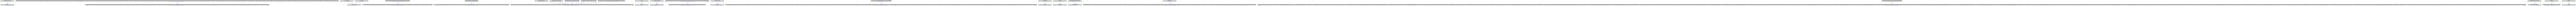

In [42]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)

In [108]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=6264aab0dbb6ca0e5eb8ccb926e283341d03ee3584c5e73aa2cc456e7dc599de
  Stored in directory: /Users/youssrarebboud/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Users/youssrarebboud/python-virtual-environments/project_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.6 MB/s eta 0:00:0000:0100:01
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/Users/youssrarebboud/python-virtual-environments/project_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/youssrarebboud/python-virtual-environments/project_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/youssrarebboud/python-virtual-environments/project_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


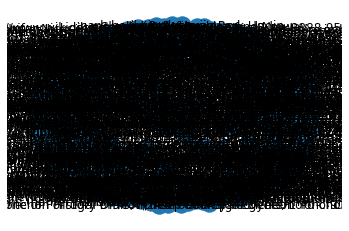

In [87]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

#url = 'https://www.w3.org/TeamSubmission/turtle/tests/test-30.ttl'

#g = rdflib.Graph()
#result = g.parse(url, format='turtle')

G = rdflib_to_networkx_multidigraph(g)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()